# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import pandas as pd
import numpy as np
import scipy

import scipy.stats
import matplotlib.pyplot as pyplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Display the dataframe

df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


## 1. Is the distribution of body temperatures normal? ##

*Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.*

The first thing to do is to plot the data as a histogram and take a look at it.

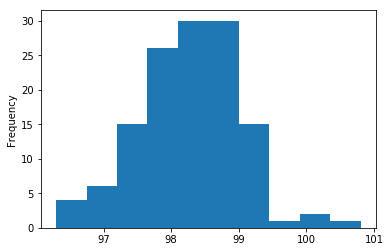

In [58]:
# Plot the body temperature data sample as a histoogram to
# see if its shape approximates a normal distribution

%matplotlib inline

temperature = df['temperature']
temperature.plot(kind='hist')


The shape of the graph certainly looks like a normal distribution, particularly when we consider that there are only 130 data points (quite a small sample), so some irregularity is to be expected.

Beyond just looking at the data, there are some statistical tests we can carry out to quantify the confidence we are able to have in this assumption of normality. Two such tests, which are provided as part of the scipy library, are Shapiro-Wilk and Kolmogorov-Smirnoff. For these two tests, we are testing the null hypothesis that our one dimensional data sample is sampled from a population that has a normal distribution. We assume a significance level of 0.05 or 95% for both these tests.

#### Shapiro-Wilk ####

The null hypothesis of the Shapiro-Wilk normality test, which was developed in 1965 and is appropriate for smaller datasets, is that the population is normally distributed. So, if the p-value of the result of the test is less than the chosen alpha level (which will here be 0.05 or 5%), then the null hypothesis is rejected. 

In [59]:
# Use scipy library to generate Shapiro-Wilk normality test
# on our body temperature data sample 

shapiro_results = scipy.stats.shapiro(temperature)

matrix_sw = [
    ['', 'Sample Size', 'Test Statistic', 'p-value'],
    ['Sample Data', len(temperature) - 1, shapiro_results[0], shapiro_results[1]]
]

shapiro_table = pd.DataFrame(matrix_sw)
print(shapiro_table)

             0            1               2         3
0               Sample Size  Test Statistic   p-value
1  Sample Data          129        0.986577  0.233175


Since our p-value is much less than our Test Statistic, we have good evidence NOT to reject the null hypothesis at the 0.05 significance level. The test therefore suggests that the actual population from which our sample came is normally distributed.


#### Kolmogorov-Smirnov ####

The Kolmogorov-Smirnov test can be used to compare a sample with a reference probability distribution. A modified version of the test can be used to compare a sample with a standard normal distribution.

In [6]:
# Use scipy library to generate Kolmogorov-Smirnov normality test
# on our body temperature data sample 

ks_results = scipy.stats.kstest(temperature, cdf='norm')

matrix_ks = [
    ['', 'Sample Size', 'Test Statistic', 'p-value'],
    ['Sample Data', len(temperature) - 1, ks_results[0], ks_results[1]]
]

ks_table = pd.DataFrame(matrix_ks)
print(ks_table)

             0            1               2        3
0               Sample Size  Test Statistic  p-value
1  Sample Data          129               1        0


Since our p-value is read as 0.0 (meaning it is "practically" 0 given the decimal accuracy of the test), and is therefore less than our Test Statistic then we have strong evidence to not reject the null-hypothesis.

We can therefore assume our sample follows a normal distribution.



## 2. Is the sample size large? Are the observations independent? ##
*Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.*

In general, it is said that Central Limit Theorem “kicks in” at a sample size N of about 30. In other words, as long as the sample is based on 30 or more observations, the sampling distribution of the mean can be safely assumed to be normal, because given the least normal distribution possible - an exponential distribution - N has to be around 30 in order for the sampling distribution of the mean to be close enough to normal for practical purposes. 

Our sample size of 129 is not huge, but it is larger than 30, so is adequate for parametric statistical analysis.

Are the samples independent? We can't know for sure from the data table alone, but the mixture of genders and the fact that the samples were taken at different heartbeats suggests that even if they were taken from just two subjects (one male, one female), the samples were taken at different times under different situations. 

Before we proceed let's isolate the temperature data as a numpy array and calculate some useful numbers.


In [35]:
temp_arr = np.array(temperature)
print(temp_arr)

[  99.3   98.4   97.8   99.2   98.    99.2   98.    98.8   98.4   98.6
   98.8   96.7   98.2   98.7   97.8   98.8   98.3   98.2   97.2   99.4
   98.3   98.2   98.6   98.4   97.8   98.    97.8   98.2   98.4   98.1
   98.3   97.6   98.5   98.6   99.3   99.5   99.1   98.3   97.9   96.4
   98.4   98.4   96.9   97.2   99.    97.9   97.4   97.4   97.9   97.1
   98.9   98.3   98.5   98.6   98.2   98.6   98.8   98.2   98.2   97.6
   99.1   98.4   98.2   98.6   98.7   97.4   97.4   98.6   98.7   98.9
   98.1   97.7   98.    98.8   99.    98.8   98.    98.4   97.4   97.6
   98.8   98.    97.5   99.2   98.6   97.1   98.6   98.    98.7   98.1
   97.8  100.    98.8   97.1   97.8   96.8   99.9   98.7   98.8   98.    99.
   98.5   98.    99.4   97.6   96.7   97.    98.6   98.7   97.3   98.8
   98.    98.2   99.1   99.    98.   100.8   97.8   98.7   98.4   97.7
   97.9   99.    97.2   97.5   96.3   97.7   98.2   97.9   98.7]


In [43]:
print("Sample mean =", np.mean(temp_arr, axis=0))
print("Sample variance =", np.var(temp_arr, axis=0))
print("Sample standard deviation =", np.std(temp_arr, axis=0))

Sample mean = 98.2492307692
Sample variance = 0.533422485207
Sample standard deviation = 0.730357778905


## 3. Is the true population mean really 98.6 degrees F? ##

We can repose this question as follows: Test the null hypothesis that the population mean = 98.6. Which can itself be restated as: What are the chances of getting a sample mean of 98.25 if the null hypothesis is true?

#### Would you use a one-sample or two-sample test? Why? ####

We're using a one-sample test here, as we're comparing the temperature sample mean to a null hypothesis value (the previously assumed population mean). We would only use a two-sample test if we were comparing the mean (or other parameter) of two separate and independently-assessed samples. 

The significance test consists of computing the probability of a sample mean differing from the true population $ \mu $ by one (the difference between the hypothesized population mean and the sample mean) or more. The first step is to determine the sampling distriution of the mean. As shown in a previous section, the mean and standard deviation of the sampling distribution of the mean are:

$ \bar x $

and:

$ \sigma_\bar x = \frac{\sigma}{\sqrt n} $

respectively. It is clear that $ \bar x $ = 98.25. In order to compute the standard deviation of the sampling distribution of the mean, we have to know the population standard deviation ($ \sigma $).

To test the null hypothesis, we compute the test statistic t using a special case of the following formula:

$ t = \frac{statistic \, - \, hypothesized\,value}{estimated\,standard\,error\,of\,the\,statistic} $

The special case of this formula applicable to testing a single mean is

$ t = \frac{\bar x - \mu}{\sigma_\bar x} $

where t is the value we compute for the significance test, $ \bar x $ is the sample mean, $ \mu $ is the hypothesized value of the population mean, and $ \sigma_\bar x $ is the estimated standard error of the mean. 

We assume the distribution of temperatures within the population to be normally distributed.

The mean $ \bar x $ of the n = 130 temperature scores is 0.733, the hypothesized value of $ \mu $ is 98.6, and the standard deviation $ \sigma_m $ is 0.733. The estimate of the standard error of the mean is therefore computed as:

$ t = \frac{\bar x - \mu}{\sigma_\bar x} $

$ t = (98.25-98.6)/(0.733/np.sqrt(130)) $ 

$ t = -5.44422099297 $

The probability value for t depends on the degrees of freedom. The number of degrees of freedom is equal to n - 1 = 129. A look-up on a one-tailed t distribution table finds that the probability of a t of 5.444 is so small as not to even register. Therefore we can reject the null hypothesis and can conclude that it is extremely unlikely that the population mean temperature is as high as 98.6 degrees fahrenheit. 


#### In this situation, is it appropriate to use the  t  or  z  statistic? ####

We are using the $ z $ statistic, as the sample size is more than 30. 


#### Now try using the other test. How is the result different? Why? ####

Another way to do this is to use the computer to resample the data sample itself, and create an actual sampling distribution. Here I've adapted some code provided by Allan Downey to resample, analyse and display the data set under discussion.


In [18]:
class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = np.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.mean()
    
    def compute_sample_statistics(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return np.array(stats)
    
    def plot_sample_stats(self):
        """Runs simulated experiments and summarizes the results.
        """
        sample_stats = self.compute_sample_statistics()
        summarize_sampling_distribution(sample_stats)
        pyplot.hist(sample_stats, color=COLOR2)
        pyplot.xlabel('sample statistic')
        pyplot.xlim(self.xlim)

In [41]:
def summarize_sampling_distribution(sample_stats):
    print('Sample standard deviation', sample_stats.std())
    print('95% Confidence Interval', np.percentile(sample_stats, [2.5, 97.5]))
    print('Sample mean', sample_stats.mean())

In [20]:
def plot_resampled_stats(n=130):
    resampler = Resampler(temperature, xlim=[97.5, 99.5])
    resampler.plot_sample_stats()

Sample standard deviation 0.0621827977078
95% Confidence Interval [ 98.13230769  98.36771154]
Sample mean 98.2519069231


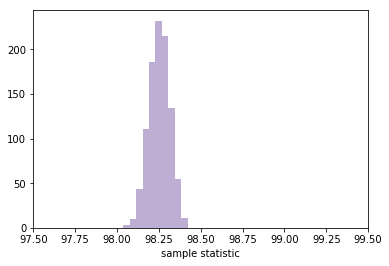

In [42]:
plot_resampled_stats(130)

If you know the standard deviation for a population, then you can calculate a confidence interval (CI) for the mean, or average, of that population. When a statistical characteristic that’s being measured (such as income, IQ, price, height, quantity, or weight) is numerical, most people want to estimate the mean (average) value for the population. 

Having done the sampling distribution, we can now estimate the population mean, $ \mu $, by using a sample mean, $ \bar x $ plus or minus a margin of error. The result is a confidence interval (CI) for the population mean $ \mu $.

When the population standard deviation is known, the formula for a confidence interval (CI) for a population mean is:

$ \bar x \pm z^* \frac{\sigma}{\sqrt n} $

where n is the sample size, and $ z^* $ represents the appropriate $ z^* $-value from the standard normal distribution for your desired confidence level.

In [22]:
# z* sd/sqrt(n)
2.58*(0.065/np.sqrt(129))

0.014765161699080712

A $ z^* $ value of 2.58 gives us a confidence interval of 99% (see below) meaning that we can be 99% certain that the actual population mean falls between -0.015 (-1.5%) and +0.015 (+1.5%) of the sample mean 98.25. 

## 4. At what temperature should we consider someone's temperature to be "abnormal"? ##
*Start by computing the margin of error and confidence interval.*

We've actually already done this above. We know that the sample mean $ \bar x $ is 98.25, and a confidence interval of 99% gives us a margin for error of 1.5% or 98.25 x 0.015 degrees F (1.47 degrees).

This gives us an upper and lower limit of 96.78 and 99.72. If someone's *average* temperature, taken over a period of a couple of hours to allow for variations in heartbeat due to exertion etc, is outside that range, we should consider it to be abnormal.


## 5. Is there a significant difference between males and females in normal temperature? ##

Let's begin by breaking out temperature data out into gendered dataframes:

In [30]:
female = df[df.gender == 'F']
female

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0
9,98.6,F,86.0
10,98.8,F,89.0
11,96.7,F,62.0
13,98.7,F,79.0
14,97.8,F,77.0


In [29]:
male = df[df.gender == 'M']
male

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0
17,98.2,M,64.0
19,99.4,M,70.0
21,98.2,M,71.0
22,98.6,M,70.0
23,98.4,M,68.0


#### What test did you use and why? ####

To test this we're going to calculate the test statistic and use it to test the null hypothesis, $ H_0 $, that there is NO difference between the average body temperature for men and women, which is to say that the mean difference between the two populations is 0: 

$$ P_1 - P_2 = 0 $$

which would also entail that the mean of any sampling distribution of the proportion between these two groups should also equal 0:

$$ \bar P_1 - \bar P_2 = 0 $$ 

The alternate hypothesis is that there IS a difference, such that:

$$ P_1 - P_2 \neq 0 $$

We want to test this with a significance level, $ \alpha $, of < 5%. If we assume $ H_0 $, this means we want to figure out the probability of our sample occuring given that $ H_0 $ is true. This probability is known as the P-value:

$$ P (\bar P_1 - \bar P_2 \, | \, H_0) < 5%) $$
 
We can do this algebraically, as laid out in the answer to question 3, above, but another way to do it is to use the computer to turn our samples into multiple hypothesised samples by resampling from it randomly to create two new samples, and looking at the differences in the means of these samples to get an idea of the probability of the occurance of our actual sample, if indeed it happened by pure chance.

Once again I'll adapt some code by Allan Downey. We begin by defining a function to quantify the size of the effect, which as pointed out above is called the "test statistic".

In [46]:
def TestStatistic(data):
    group1, group2 = data
    test_stat = abs(group1.mean() - group2.mean())
    return test_stat

Now we extract our gendered temperature data as two pandas series and run them through our TestStatistic function:

In [44]:
group1 = male.temperature
group2 = female.temperature

In [47]:
actual = TestStatistic((group1, group2))
actual

0.289230769230727

The actual difference in the means is 0.289 degrees F.

The null hypothesis is that there is no difference between the groups. We can model that by forming a pooled sample that includes both men and women.

In [49]:
n, m = len(group1), len(group2)
pool = np.hstack((group1, group2))

Then we can simulate the null hypothesis by shuffling the pool and dividing it into two groups, using the same sizes as the actual sample.

In [52]:
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

The result of running the model is two NumPy arrays with the shuffled temperatures:

In [53]:
RunModel()

(array([ 99. ,  98.2,  98.6,  98.2,  98.4,  98.9,  97.9,  97.4,  98. ,
         99. ,  97.7,  99.1,  98.8,  98.6,  98.8,  98.6,  98.2,  97.9,
         96.3,  97.4,  98.7,  98.4,  98.3,  99.1,  98.9,  98.6,  97.7,
         98.6,  98.4,  98. ,  98.7,  98. ,  99.2,  97.2,  97.5,  97.1,
         98.1,  99.9,  98.6,  98.8,  97.8,  97.2,  98.4,  97.9,  96.8,
         98.6,  97.7,  98.4,  99.3,  97.8,  98.8,  98.3,  98. ,  98.5,
         98.2,  96.7,  97.9,  97.3,  98.6,  97.6,  97.6,  97.2,  96.4,
         98. ,  99. ]),
 array([  98.6,   97.8,   99. ,   98.5,   96.9,   99.5,   97.6,   98. ,
          98.2,  100.8,   98. ,   98. ,  100. ,   98.2,   98.4,   98.2,
          99.4,   97.4,   98.4,   97.8,   98.4,   98.3,   99.2,   97.9,
          98. ,   98.7,   99.3,   99. ,   97.4,   98.5,   98.8,   99.2,
          97.5,   97.8,   98.1,   98.3,   98.7,   98.3,   98.8,   96.7,
          98.4,   98.7,   97.1,   98. ,   98.7,   98.1,   98.2,   97.1,
          98.7,   98.2,   98.6,   97.4,   98.7,

Then we compute the same test statistic using the simulated data:

In [54]:
TestStatistic(RunModel())

0.076923076923080203

If we now run the model 1000 times and compute the test statistic, we can see how much the test statistic varies under the null hypothesis.

In [55]:
test_stats = np.array([TestStatistic(RunModel()) for i in range(1000)])
test_stats.shape

(1000,)

Here's the sampling distribution of the test statistic under the null hypothesis, with the actual difference in means indicated by a gray line.

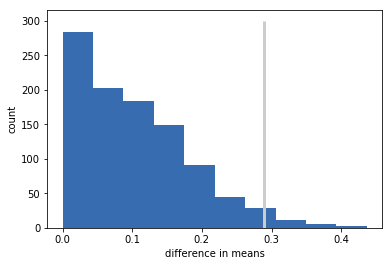

In [56]:
pyplot.vlines(actual, 0, 300, linewidth=3, color='0.8')
pyplot.hist(test_stats, color=COLOR5)
pyplot.xlabel('difference in means')
pyplot.ylabel('count')
None

The p-value is the probability that the test statistic under the null hypothesis exceeds the actual value, 0.289.

In [57]:
pvalue = sum(test_stats >= actual) / len(test_stats)
pvalue

0.025000000000000001

#### Write a story with your conclusion in the context of the original problem. ####

As we can see, the p-value is almost exactly 2.5%. This is the probability that the actual difference between the temperatures of men and women that we observed could be due to chance. This is below our standard alpha threshold of 5%, so we can reject the null hypothesis and be 95% confidence that there is a significant difference between the normal temperatures of men and women.




